In [1]:
#For colab
"""
!pip install \
'git+https://github.com/facebookresearch/segment-anything.git'
!pip install -q roboflow supervision
!wget -q \
'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth'
"""

"\n!pip install 'git+https://github.com/facebookresearch/segment-anything.git'\n!pip install -q roboflow supervision\n!wget -q 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth'\n"

In [2]:
import torch
from segment_anything import SamPredictor, sam_model_registry

#DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
DEVICE = torch.device('cpu')
MODEL_TYPE = "vit_b"

print("Using device:", DEVICE)
sam = sam_model_registry[MODEL_TYPE](checkpoint="checkpoints/sam_vit_b.pth")
sam.to(DEVICE)

Using device: cpu


Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()
    )


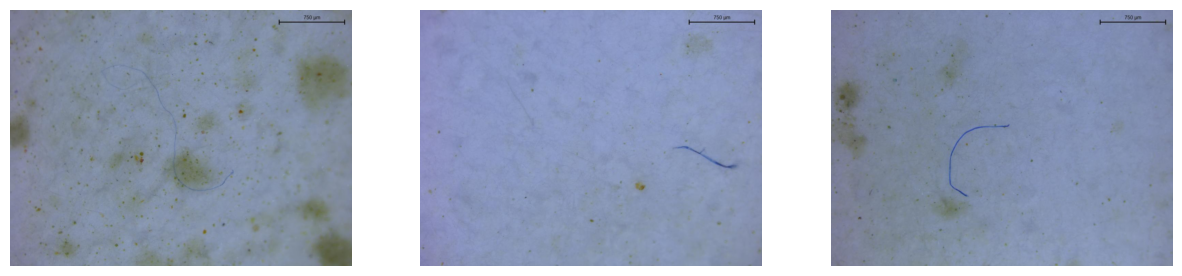

In [3]:
from PIL import Image
import os
import cv2
from matplotlib import pyplot as plt

images = []
images_names = []
for file in os.listdir("./fibras_low_res"):
    if file.endswith(".jpg"):
        images_names.append(str(file))
        image_bgr = cv2.imread(os.path.join("./fibras_low_res/", file))
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        images.append(image_rgb)

import random
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axs[i].imshow(np.array(images[random.randint(0, len(images))]))
    axs[i].axis("off")

In [4]:
from segment_anything import SamAutomaticMaskGenerator

mask_generator = SamAutomaticMaskGenerator(sam)

for i,img in enumerate(images):
  mask = mask_generator.generate(img)
  n_mask = len(mask)
  for n in range(n_mask):
    #cv2.imwrite("./masks/mask_{}_{}.png".format(images_names[i],n), mask[n]['segmentation'].astype(int)*255)
    print(mask[n]['bbox'])

: 